<a href="https://colab.research.google.com/github/ayushrathod04/MACHINE_LEARNING/blob/main/intershipday13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

self made algorithm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
class Linear_Regression():

    def __init__(self,learning_rate,no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
    def fit(self,x,y):
        self.m,self.n=x.shape
        self.w=np.zeros(self.n)
        self.b=0
        self.x=x
        self.y=y

        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self): # Fixed indentation here

        y_prediction=self.predict(self.x)
        dw = -(2*(self.x.T).dot(self.y - y_prediction)) / self.m # Fixed the subtraction here
        db = -2 * np.sum(self.y - y_prediction) / self.m
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
    def predict(self,x):
        return x.dot(self.w) + self.b

In [ ]:
sal_df = pd.read_csv('/content/salary_data - salary_data.csv')

In [ ]:
sal_df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salx = sal_df.drop('Salary',axis=1)
saly = sal_df['Salary']

In [ ]:
salx_train,salx_test,saly_train,saly_test = train_test_split(salx,saly,test_size=0.3,random_state=2)

In [ ]:
print(salx_train.shape)
print(saly_train.shape)
print(saly_train.shape)

(21, 1)
(21,)
(21,)


In [ ]:
model = Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [ ]:
model.fit(salx_train,saly_train)

In [ ]:
print('weight',model.w[0])
print('bias',model.b)

weight 9534.934692142133
bias 23735.972514255136


In [ ]:
test_pred = model.predict(salx_test)
print(test_pred)

1      36131.387614
0      34224.400676
14     66643.178629
9      59015.230875
21     91434.008828
19     80945.580667
23    101922.436990
6      52340.776591
3      42805.841899
dtype: float64


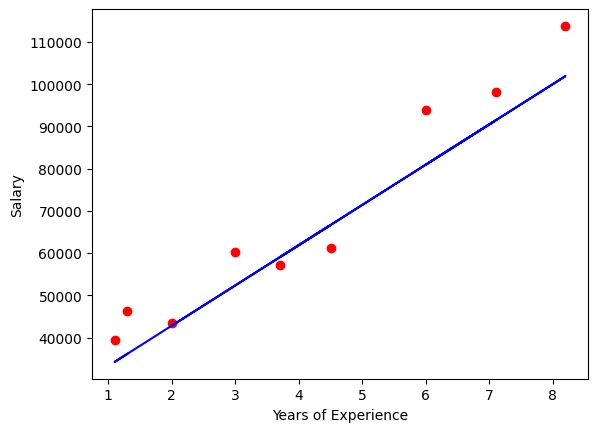

In [ ]:
plt.scatter(salx_test,saly_test,color='red')
plt.plot(salx_test,test_pred,color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
bst_df = pd.read_csv('/content/BostonHousing (1) - BostonHousing (1).csv')

In [ ]:
bst_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
bst_df.shape

(506, 14)

In [ ]:
bst_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [ ]:
correlation = bst_df.corr()

In [ ]:
print(correlation)

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
b       -0.385064  0.175520 

<Axes: >

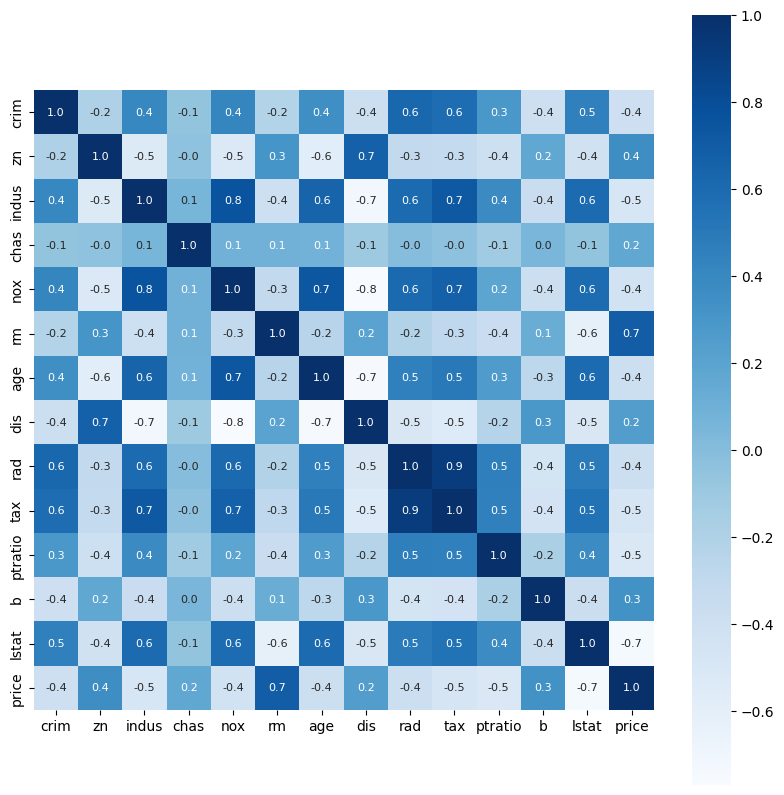

In [ ]:
plt.figure(figsize=(10,10))
sb.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
bhx  = bst_df.drop('price',axis=1)
bhy = bst_df['price']

In [ ]:
print(bhx)
print(bhy)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [ ]:
bhx_train,bhx_test,bhy_train,bhy_test = train_test_split(bhx,bhy,test_size=0.2,random_state=3)

In [ ]:
print(bhx_train.shape)
print(bhy_train.shape)
print(bhy_train.shape)

(404, 13)
(404,)
(404,)


In [ ]:
bh_model = XGBRegressor()

In [ ]:
bh_model.fit(bhx_train,bhy_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
bhx_train_pred  = bh_model.predict(bhx_train)
print(bhx_train_pred)

[14.890703  19.642195  35.400345  12.016242  20.381865  23.702316
 21.004805  50.00535   27.489727  12.681885  17.404818  23.786222
 22.894043  18.505577  30.301188  31.19518   16.000065  23.340284
 14.999737  10.195938  12.533196  19.588732  19.676384  19.53493
 14.997095  35.398685  13.5039215 20.58683   24.708351  21.901182
 17.090359  23.616112  21.102757  15.59351   18.517344   8.301923
 14.518146  23.914145  11.824473  24.599672  24.801905  18.732233
 17.899395  48.80669   13.015619  29.601875  18.004438  20.101824
 17.298218  23.106688  22.618582  13.792718  43.835552  35.205963
 22.610245  17.42741   48.506363  31.497694  15.606423  14.210823
 20.595139  22.02745   20.101086  17.591436  23.700542  14.104831
 19.799774  24.398348  33.40823   39.79762   34.915394  24.779575
 14.592391  23.363775  33.828697  23.888693   9.600326  21.75628
 31.609694  14.484305   7.1900516 24.100216  21.402494  17.213398
 46.000633  23.1129    14.500982  20.505697  16.986746  48.29493
 30.520454  2

In [ ]:
score_1=metrics.r2_score(bhy_train,bhx_train_pred)
score_2=metrics.mean_absolute_error(bhy_train,bhx_train_pred)

In [ ]:
print(score_1)
print(score_2)

0.9999968327963358
0.011230918676546346


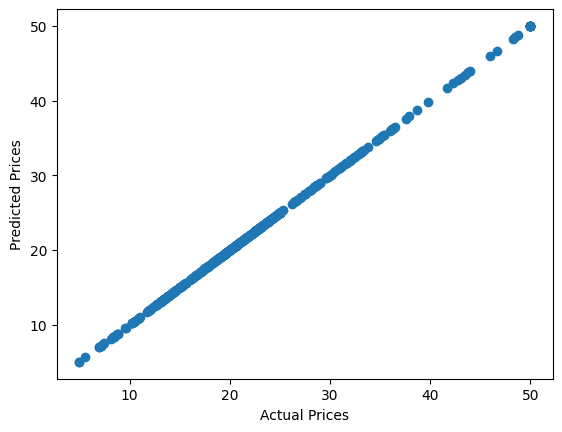

In [ ]:
plt.scatter(bhy_train,bhx_train_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [ ]:
input_data = (0.00632,18.0,2.31,0,0.538,6.575)

In [ ]:
input_data_as_numpy_array = np.asarray(input_data)

In [ ]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [ ]:
input_data_reshaped.shape

(1, 6)

In [ ]:
# Assuming 'input_data' should have 13 features,
# replace with the actual values for the missing features.
input_data = (0.00632,18.0,2.31,0,0.538,6.575, 0, 0, 0, 0, 0, 0, 0)  # Add missing features

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = bh_model.predict(input_data_reshaped)

print(prediction)

[45.148975]


<Axes: >

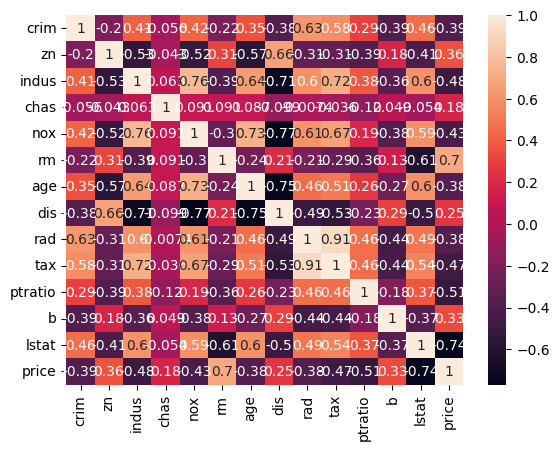

In [ ]:
sns.heatmap(bst_df.corr(),annot=True)